<a href="https://colab.research.google.com/github/MuchereShawn/WeightsandBiases/blob/main/WeightandBiasesRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install wandb

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 29.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 303.6/303.6 kB 17.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 4.2 MB/s eta 0:00:00


In [2]:
import wandb

In [3]:
!wandb login

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [4]:
wandb.init(project="phishin detection using logistic regression")
config = wandb.config
config.learning_rate = 0.01
config.epochs = 10

wandb: Currently logged in as: mukoyanishawn33 (mukoyanishawn33-usiu). Use `wandb login --relogin` to force relogin


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
wandb =pd.read_csv("/content/urlset (1).csv",encoding='latin-1',on_bad_lines='skip')

In [7]:
wandb.head()

,domain,ranking,mld_res,mld.ps_res,card_rem,ratio_Rrem,ratio_Arem,jaccard_RR,jaccard_RA,jaccard_AR,jaccard_AA,jaccard_ARrd,jaccard_ARrem,label,Unnamed: 14
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,10000000,1,0,18.0,107.611111,107.277778,0.0,0.0,0.0,0,0.8,0.795729,1,NaN
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,10000000,0,0,11.0,150.636364,152.272727,0.0,0.0,0.0,0,0,0.768577,1,NaN
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,10000000,0,0,14.0,73.500000,72.642857,0.0,0.0,0.0,0,0,0.726582,1,NaN
3,mail.printakid.com/www.online.americanexpress....,10000000,0,0,6.0,562.000000,590.666667,0.0,0.0,0.0,0,0,0.85964,1,NaN
4,thewhiskeydregs.com/wp-content/themes/widescre...,10000000,0,0,8.0,29.000000,24.125000,0.0,0.0,0.0,0,0,0.748971,1,NaN


In [8]:
wandb.shape

(65535, 15)

In [9]:
wandb.sample(40)

,domain,ranking,mld_res,mld.ps_res,card_rem,ratio_Rrem,ratio_Arem,jaccard_RR,jaccard_RA,jaccard_AR,jaccard_AA,jaccard_ARrd,jaccard_ARrem,label,Unnamed: 14
43599,bandacruzroja.es/de/?,10000000,0,0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,1,NaN
55979,scholar.lib.vt.edu/theses/available/etd-051799...,6332,1,1,8.0,55.000000,51.500000,0.008529,0.006787,0.004464,0.002375,0.34375,0.756701,0,NaN
59485,www.swan.ac.uk/compsci/,120991,1,0,1.0,7.000000,4.000000,0.000000,0.000000,0.000000,0,0.535714,0.222222,0,NaN
49554,www.sixdegreesrecords.com/home.php,10000000,0,0,2.0,457.000000,491.000000,0.000000,0.000000,0.000000,0,0,0.802281,0,NaN
49290,www.eforu.com/gallery/nikitaylor/gallery1.html,478155,0,0,4.0,112.250000,110.750000,0.000000,0.000000,0.000000,0,0,0.791165,0,NaN
61111,www.w3.org/TR/xhtml-basic/,483,1,1,2.0,36.500000,33.500000,0.157303,0.168675,0.108108,0.101449,0.5,0.609195,0,NaN
5372,www.comprapremiada.pt.vg/index.php,10000000,0,0,2.0,265.000000,277.500000,0.000000,0.000000,0.000000,0,0,0.82968,1,NaN
33352,paypal.educacionparalavida.com/792e6b2de4b5d23...,10000000,0,0,7.0,250.285714,257.571429,0.000000,0.000000,0.000000,0,0,0.813776,1,NaN
49245,www.eforu.com/gallery/katemoss/gallery1.html,478155,0,0,4.0,100.250000,103.250000,0.000000,0.000000,0.000000,0,0,0.808889,0,NaN
54356,www.business-marketing.com/store/index.html,548103,0,0,3.0,205.333333,213.666667,0.000000,0.000000,0.000000,0,0,0.762973,0,NaN


In [10]:
wandb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65535 entries, 0 to 65534
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   domain         65531 non-null  object 
 1   ranking        65470 non-null  object 
 2   mld_res        65452 non-null  object 
 3   mld.ps_res     65443 non-null  object 
 4   card_rem       65437 non-null  float64
 5   ratio_Rrem     65437 non-null  float64
 6   ratio_Arem     65437 non-null  float64
 7   jaccard_RR     65437 non-null  float64
 8   jaccard_RA     65435 non-null  float64
 9   jaccard_AR     65434 non-null  float64
 10  jaccard_AA     65433 non-null  object 
 11  jaccard_ARrd   65433 non-null  object 
 12  jaccard_ARrem  65430 non-null  object 
 13  label          65427 non-null  object 
 14  Unnamed: 14    2 non-null      float64
dtypes: float64(7), object(8)
memory usage: 7.5+ MB


In [11]:
wandb.describe(include='all')
wandb.columns
wandb.isnull().sum()

domain               4
ranking             65
mld_res             83
mld.ps_res          92
card_rem            98
ratio_Rrem          98
ratio_Arem          98
jaccard_RR          98
jaccard_RA         100
jaccard_AR         101
jaccard_AA         102
jaccard_ARrd       102
jaccard_ARrem      105
label              108
Unnamed: 14      65533
dtype: int64

In [12]:
X=wandb.drop(columns=['label','domain'])
y =wandb['label']

In [13]:
X

,ranking,mld_res,mld.ps_res,card_rem,ratio_Rrem,ratio_Arem,jaccard_RR,jaccard_RA,jaccard_AR,jaccard_AA,jaccard_ARrd,jaccard_ARrem,Unnamed: 14
0,10000000,1,0,18.0,107.611111,107.277778,0.000000,0.00000,0.000000,0,0.8,0.795729,NaN
1,10000000,0,0,11.0,150.636364,152.272727,0.000000,0.00000,0.000000,0,0,0.768577,NaN
2,10000000,0,0,14.0,73.500000,72.642857,0.000000,0.00000,0.000000,0,0,0.726582,NaN
3,10000000,0,0,6.0,562.000000,590.666667,0.000000,0.00000,0.000000,0,0,0.85964,NaN
4,10000000,0,0,8.0,29.000000,24.125000,0.000000,0.00000,0.000000,0,0,0.748971,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
65530,10000000,0,0,1.0,10.000000,9.000000,0.000000,0.00000,0.000000,0,0,0.583333,NaN
65531,2425,1,1,1.0,129.000000,152.000000,0.006494,0.00565,0.007092,0.006098,0.5,0.682635,NaN
65532,10000000,0,0,1.0,164.000000,179.000000,0.000000,0.00000,0.000000,0,0,0.689655,NaN
65533,51274,0,0,4.0,654.750000,693.250000,0.000000,0.00000,0.000000,0,0,0.865099,NaN


In [14]:
y

0        1
1        1
2        1
3        1
4        1
        ..
65530    0
65531    0
65532    0
65533    0
65534    0
Name: label, Length: 65535, dtype: object

In [15]:
for col in X.columns:
  if X[col].dtype == 'object':
    try:
      X[col] = pd.to_numeric(X[col], errors='coerce')
    except:
      pass

X.fillna(X.mean(), inplace=True)
X.isnull().sum()

ranking          0
mld_res          0
mld.ps_res       0
card_rem         0
ratio_Rrem       0
ratio_Arem       0
jaccard_RR       0
jaccard_RA       0
jaccard_AR       0
jaccard_AA       0
jaccard_ARrd     0
jaccard_ARrem    0
Unnamed: 14      0
dtype: int64

In [16]:
for i in range(len(y)):
  if y.dtype == 'object':
    try:
      y.iloc[i] = pd.to_numeric(y.iloc[i], errors='coerce')
    except:
      pass

y.fillna(y.mean(), inplace=True)
y.isnull().sum()

Streaming output truncated to the last 5000 lines.
<ipython-input-16-d592f5be0b50>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.iloc[i] = pd.to_numeric(y.iloc[i], errors='coerce')
<ipython-input-16-d592f5be0b50>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.iloc[i] = pd.to_numeric(y.iloc[i], errors='coerce')
<ipython-input-16-d592f5be0b50>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.iloc[i] = pd.to_numeric(y.iloc[i], 

0

<Axes: >

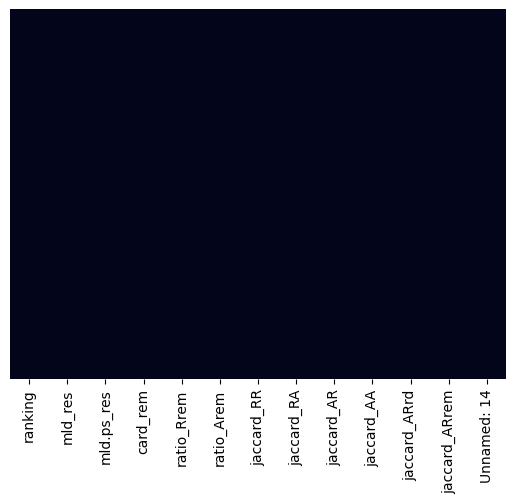

In [18]:
sns.heatmap(X.isnull(),yticklabels=False,cbar=False,cmap='rocket')

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
X_train

,ranking,mld_res,mld.ps_res,card_rem,ratio_Rrem,ratio_Arem,jaccard_RR,jaccard_RA,jaccard_AR,jaccard_AA,jaccard_ARrd,jaccard_ARrem,Unnamed: 14
59131,10000000.0,0.0,0.0,2.0,259.000000,273.500000,0.0,0.0,0.0,0.0,0.00,0.743044,1.0
108,10000000.0,0.0,0.0,7.0,104.285714,104.571429,0.0,0.0,0.0,0.0,0.00,0.813896,1.0
2440,10000000.0,1.0,0.0,5.0,109.000000,108.000000,0.0,0.0,0.0,0.0,0.80,0.835871,1.0
35243,10000000.0,0.0,0.0,4.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00,0.000000,1.0
53679,10000000.0,0.0,0.0,3.0,183.666667,195.000000,0.0,0.0,0.0,0.0,0.00,0.747692,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
62570,10000000.0,0.0,0.0,2.0,21.000000,12.500000,0.0,0.0,0.0,0.0,0.00,0.522727,1.0
38158,10000000.0,0.0,0.0,4.0,224.250000,242.250000,0.0,0.0,0.0,0.0,0.00,0.782235,1.0
860,10000000.0,0.0,0.0,7.0,40.142857,36.428571,0.0,0.0,0.0,0.0,0.00,0.717949,1.0
15795,2741.0,1.0,1.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.32,0.000000,1.0


In [20]:
X_test

,ranking,mld_res,mld.ps_res,card_rem,ratio_Rrem,ratio_Arem,jaccard_RR,jaccard_RA,jaccard_AR,jaccard_AA,jaccard_ARrd,jaccard_ARrem,Unnamed: 14
63126,10000000.0,1.0,0.0,5.0,84.600000,86.600000,0.002137,0.002092,0.002151,0.002105,0.816327,0.802105,1.0
41103,4570.0,1.0,1.0,14.0,107.000000,104.857143,0.004651,0.004065,0.002663,0.002037,0.571429,0.818516,1.0
3989,10000000.0,1.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
37213,10000000.0,0.0,0.0,6.0,232.500000,248.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.774293,1.0
30665,10000000.0,0.0,0.0,4.0,187.750000,198.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.793264,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19421,10000000.0,0.0,0.0,19.0,59.789474,54.473684,0.000000,0.000000,0.000000,0.000000,0.000000,0.692128,1.0
3489,11.0,1.0,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.513514,0.000000,1.0
44346,10000000.0,0.0,0.0,11.0,92.454545,91.181818,0.000000,0.000000,0.000000,0.000000,0.000000,0.765734,1.0
7078,10000000.0,0.0,0.0,8.0,184.375000,183.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.761078,1.0


In [21]:
y_train

59131    0.0
108      1.0
2440     1.0
35243    1.0
53679    0.0
        ... 
62570    0.0
38158    1.0
860      1.0
15795    1.0
56422    0.0
Name: label, Length: 52428, dtype: float64

In [22]:
y_test

63126    0.0
41103    1.0
3989     1.0
37213    1.0
30665    1.0
        ... 
19421    1.0
3489     1.0
44346    1.0
7078     1.0
40694    1.0
Name: label, Length: 13107, dtype: float64

In [23]:
from sklearn.linear_model import LogisticRegression
for epoch in range(config.epochs):
  logmodel = LogisticRegression()
  threshold =0.5
  y_train=(y_train>threshold).astype(int)
  y_test=(y_test>threshold).astype(int)
  logmodel.fit(X_train,y_train)
  prediction = logmodel.predict(X_test)

In [24]:
prediction

array([1, 0, 1, ..., 1, 1, 0])

In [25]:
y_test

63126    0
41103    1
3989     1
37213    1
30665    1
        ..
19421    1
3489     1
44346    1
7078     1
40694    1
Name: label, Length: 13107, dtype: int64

In [26]:
from sklearn.metrics import auc, accuracy_score, classification_report,log_loss,confusion_matrix

In [27]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.58      0.37      0.45      3498
           1       0.80      0.90      0.85      9609

    accuracy                           0.76     13107
   macro avg       0.69      0.64      0.65     13107
weighted avg       0.74      0.76      0.74     13107



In [33]:
!pip install scikit-plot
import scikitplot as skplt

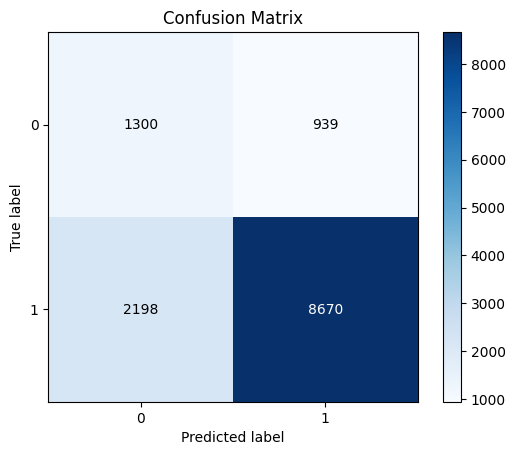

In [34]:
skplt.metrics.plot_confusion_matrix(prediction,y_test)
plt.show()

In [29]:
train_accuracy= accuracy_score(y_train,logmodel.predict(X_train))
test_accuracy= accuracy_score(y_test,prediction)

print("Train Accuracy : ",train_accuracy)
print("Test Accuracy : ",test_accuracy	)

Train Accuracy :  0.7600709544518196
Test Accuracy :  0.7606622415503166


In [30]:
from sklearn.metrics import roc_auc_score

In [31]:
test_auc=roc_auc_score(y_test,prediction)
print("Test AUC : ",test_auc)

Test AUC :  0.6369600255049628


In [39]:
wandb.init()
wandb.log({'epoch': epoch+1, 'train_accuracy':train_accuracy, 'test_accuracy':test_accuracy, 'test_auc':test_auc})

In [40]:
wandb.finish()

epoch,▁
test_accuracy,▁
test_auc,▁
train_accuracy,▁
epoch,10
test_accuracy,0.76066
test_auc,0.63696
train_accuracy,0.76007
